In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.size'] = 12

data=pd.read_csv("cleaned_data.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
X= data['LIMIT_BAL'].values.reshape(-1,1)
y=data['default payment next month'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import *
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


Unique  values of test data:---- (array([0, 1], dtype=int64), array([6235, 1765], dtype=int64))
Unique  values of predicted data:---- (array([0], dtype=int64), array([8000], dtype=int64))


confusion_matrix==
 [[6235    0]
 [1765    0]] 

Accuracy of the model== 77.9375 %


Text(0, 0.5, 'Number of samples')

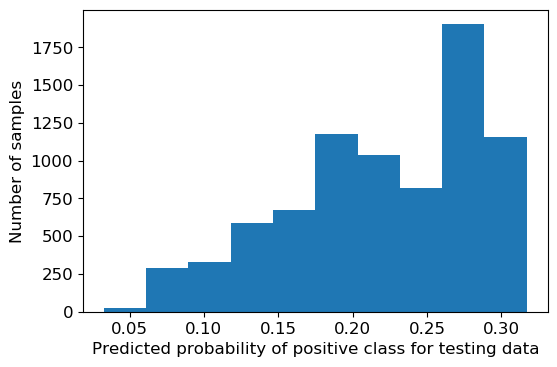

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score , confusion_matrix 
import matplotlib.pyplot as plt



y_pred = classifier.predict(X_test)

print('Unique  values of test data:----',np.unique(y_test,return_counts=True))
print('Unique  values of predicted data:----',np.unique(y_pred,return_counts=True))
print("\n")

a=confusion_matrix(y_test,y_pred)
print("confusion_matrix==\n",a,'\n')


result2 = accuracy_score(y_test,y_pred)
print("Accuracy of the model==",result2*100,'%')



y_pred_proba = classifier.predict_proba(X_test)



prob_sum = np.sum(y_pred_proba,1)


pos_proba = y_pred_proba[:,1]
pos_proba
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [6]:
from sklearn.metrics import roc_curve , roc_auc_score


print('ROC AUC score of the model(LIMIT_BAL):--',roc_auc_score(y_test, pos_proba))
print('ROC AUC score of the model(EDUCATION):-- 0.5373955250116241')

ROC AUC score of the model(LIMIT_BAL):-- 0.6116796572396983
ROC AUC score of the model(EDUCATION):-- 0.5373955250116241


_________________________________________________________________________
**Now, plot the ROC curve.**


 FPR:- [0.         0.01283079 0.0734563  0.11772253 0.12285485 0.22902967
 0.25292702 0.27538091 0.32782678 0.34803528 0.37963111 0.39887731
 0.42165196 0.44811548 0.47153168 0.50681636 0.53199679 0.55028067
 0.58235766 0.59021652 0.64603047 0.67072975 0.68773055 0.71467522
 0.73728949 0.75092221 0.76936648 0.77947073 0.79502807 0.80866079
 0.82999198 0.84089816 0.85084202 0.85084202 0.85821973 0.86672013
 0.87570168 0.90729751 0.91082598 0.91708099 0.92477947 0.93440257
 0.93696872 0.94242181 0.94498797 0.94755413 0.9542903  0.9563753
 0.95974338 0.96391339 0.96615878 0.99390537 0.99406576 0.99454691
 0.9947073  0.99550922 0.99647153 0.99695269 0.99711307 0.99807538
 0.99839615 0.99855654 0.99871692 0.99903769 0.99919808 0.99951885
 0.99951885 1.        ] 

 TPR:- [0.         0.03116147 0.12691218 0.21416431 0.22266289 0.36657224
 0.40113314 0.43116147 0.48215297 0.50538244 0.54674221 0.56770538
 0.59660057 0.61586402 0.64759207 0.67478754 0.69518414 0.70538244
 0.73031161 0.74050992 

Text(0.5, 1.0, 'ROC curve')

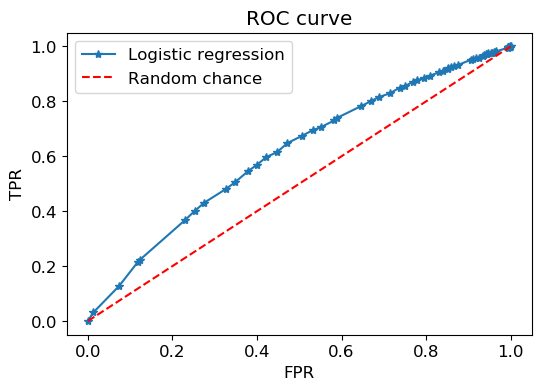

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, pos_proba)
print(' FPR:-',fpr,'\n\n','TPR:-', tpr)
mpl.rcParams['figure.dpi'] = 100
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [8]:
from sklearn.metrics import precision_recall_curve,auc

precision, recall, thresholds = precision_recall_curve(y_test, pos_proba)


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision Recall Curve')

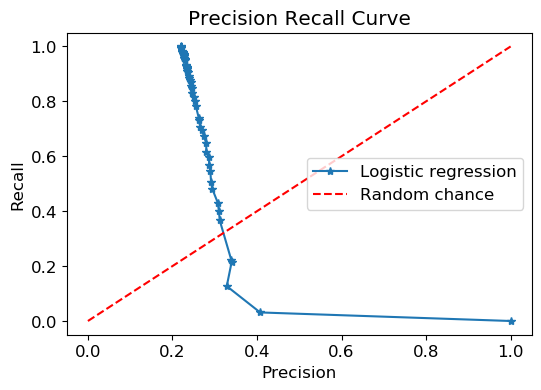

In [9]:
mpl.rcParams['figure.dpi'] = 100
plt.plot(precision, recall, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [10]:
area = auc(recall, precision)
print("Area under the precision-recall curve of Testing data:- ",area)

y_pred_proba1 = classifier.predict_proba(X_train)
pos_proba1 = y_pred_proba1[:,1]
precision1, recall1, thresholds1 = precision_recall_curve(y_train, pos_proba1)

area1=auc(recall1, precision1)
print("\nArea under the precision-recall curve of Training data:- ",area1)


Area under the precision-recall curve of Testing data:-  0.30664322552132595

Area under the precision-recall curve of Training data:-  0.31918768641846834


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [11]:
y_pred_proba = classifier.predict_proba(X_train)

pos_proba = y_pred_proba[:,1]
print('ROC AUC score of the model(LIMIT_BAL)(Training Data):--',roc_auc_score(y_train, pos_proba))
print('ROC AUC score of the model(LIMIT_BAL)(Testing data):-- 0.6116796572396983')


ROC AUC score of the model(LIMIT_BAL)(Training Data):-- 0.6216715663943194
ROC AUC score of the model(LIMIT_BAL)(Testing data):-- 0.6116796572396983


    How is this different, conceptually and quantitatively, from your earlier calculation?


#### The higher the ROC AUC score, the better the performance of the model.
##### As we can observe that ROC AUC score of training data is higher than testing data.As this is obvious because in the training data the model has used them while training whereas testing data are values that the model as never been seen before,hence it is obvious the model will be more fitted for training data as compared to testing data